In [1]:
#read in all folder names, change them to just the bird names to be used in the model building process
import re
import os
base_dir = "D:/datasets/birds/archive (1)/birds_train"

#new_name = re.sub('[0-9]', '', file_name)

In [15]:
"""for fn in os.listdir(base_dir):
    new_name = re.sub("[^A-z0-9_]+", "", fn)
    new_name = re.sub("[0-9]","",new_name)
    os.rename(os.path.join(base_dir, fn),os.path.join(base_dir, new_name))
    print(new_name)"""

#Commented out so it is not run again

Black_footed_Albatross
Laysan_Albatross
Sooty_Albatross
Groove_billed_Ani
Crested_Auklet
Least_Auklet
Parakeet_Auklet
Rhinoceros_Auklet
Brewer_Blackbird
Red_winged_Blackbird
Rusty_Blackbird
Yellow_headed_Blackbird
Bobolink
Indigo_Bunting
Lazuli_Bunting
Painted_Bunting
Cardinal
Spotted_Catbird
Gray_Catbird
Yellow_breasted_Chat
Eastern_Towhee
Chuck_will_Widow
Brandt_Cormorant
Red_faced_Cormorant
Pelagic_Cormorant
Bronzed_Cowbird
Shiny_Cowbird
Brown_Creeper
American_Crow
Fish_Crow
Black_billed_Cuckoo
Mangrove_Cuckoo
Yellow_billed_Cuckoo
Gray_crowned_Rosy_Finch
Purple_Finch
Northern_Flicker
Acadian_Flycatcher
Great_Crested_Flycatcher
Least_Flycatcher
Olive_sided_Flycatcher
Scissor_tailed_Flycatcher
Vermilion_Flycatcher
Yellow_bellied_Flycatcher
Frigatebird
Northern_Fulmar
Gadwall
American_Goldfinch
European_Goldfinch
Boat_tailed_Grackle
Eared_Grebe
Horned_Grebe
Pied_billed_Grebe
Western_Grebe
Blue_Grosbeak
Evening_Grosbeak
Pine_Grosbeak
Rose_breasted_Grosbeak
Pigeon_Guillemot
California_Gu

In [16]:
len(os.listdir(base_dir))

200

200 bird species.

In [2]:
from fastai.vision.all import *

In [3]:
dest = "D:/datasets/birds/archive (1)/birds_train/Common_Raven/1.jpg"

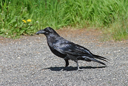

In [4]:
im = Image.open(dest)
im.to_thumb(128,128)

In [3]:
path = Path("D:/datasets/birds/images_complete/birds_train")

In [4]:
birds = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))

In [5]:
dls = birds.dataloaders(path)

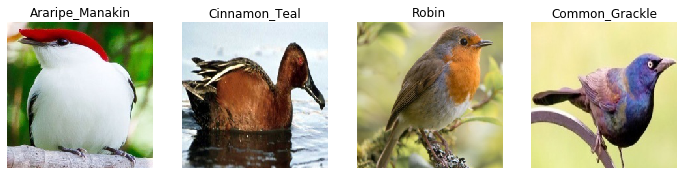

In [6]:
dls.valid.show_batch(max_n=4, nrows=1)

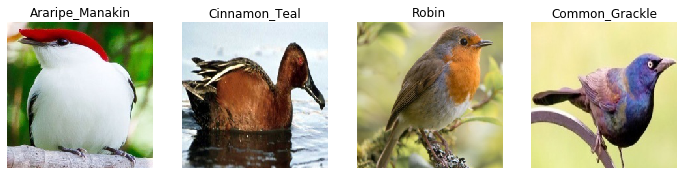

In [7]:
# data augmentation
birds = birds.new(item_tfms=Resize(224, ResizeMethod.Squish))
dls = birds.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

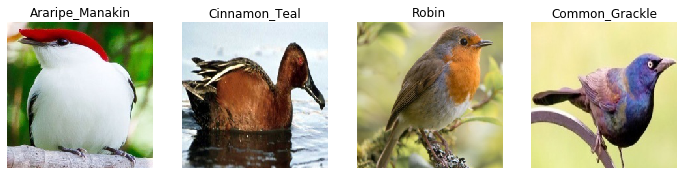

In [8]:
birds = birds.new(item_tfms=Resize(224, ResizeMethod.Pad, pad_mode='zeros'))
dls = birds.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

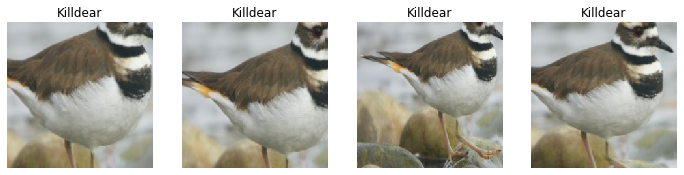

In [9]:
birds = birds.new(item_tfms=RandomResizedCrop(224, min_scale=0.3))
dls = birds.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

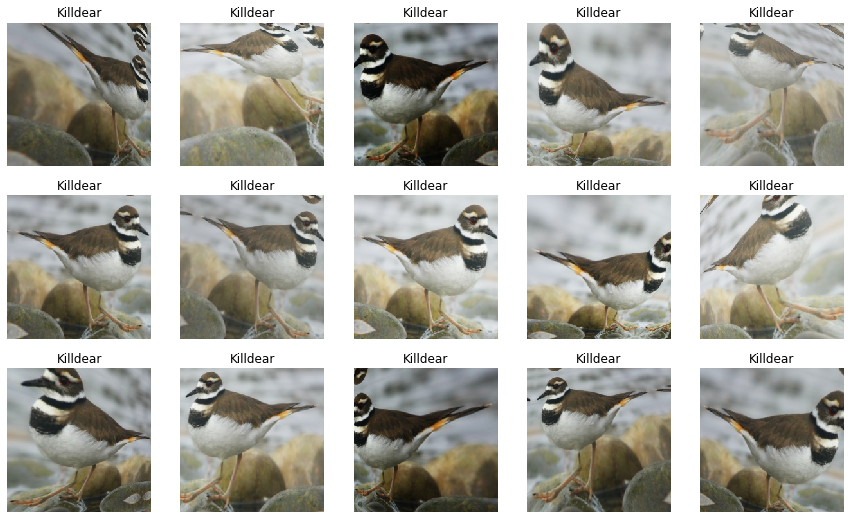

In [10]:
birds = birds.new(item_tfms = Resize(224), batch_tfms = aug_transforms(mult = 2))
dls = birds.dataloaders(path)
dls.train.show_batch(max_n = 15, nrows = 3, unique = True)

In [11]:
# training the first model
#loading and transforming the data
birds = birds.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = birds.dataloaders(path, num_workers = 0)

In [14]:
learn = cnn_learner(dls,resnet34, metrics=error_rate).to_fp16()

In [15]:
learn.fine_tune(7)

epoch,train_loss,valid_loss,error_rate,time
0,2.081035,1.039756,0.251982,15:25


epoch,train_loss,valid_loss,error_rate,time
0,1.109038,0.621518,0.146433,1:14:37
1,0.920256,0.552086,0.145738,11:18
2,0.725466,0.419529,0.117925,04:42
3,0.526564,0.368943,0.102767,04:43
4,0.342580,0.308441,0.082742,04:44
5,0.254715,0.282356,0.077180,04:43
6,0.211563,0.277105,0.072869,04:55


In [17]:
interp = ClassificationInterpretation.from_learner(learn)
#interp.plot_confusion_matrix()

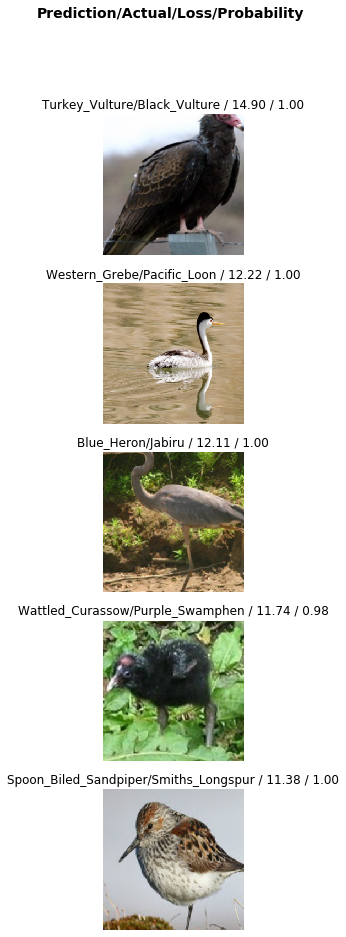

In [24]:
interp.plot_top_losses(5, nrows=5)

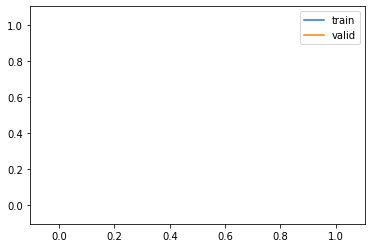

In [20]:
learn.recorder.plot_loss()

In [22]:
learn.export(fname = "first_training.pkl")

In [25]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.350576,0.395339,0.098735,10:34


epoch,train_loss,valid_loss,error_rate,time
0,0.413860,0.433973,0.106939,04:50
1,0.304033,0.335256,0.086497,04:55
2,0.198697,0.299450,0.078153,04:54


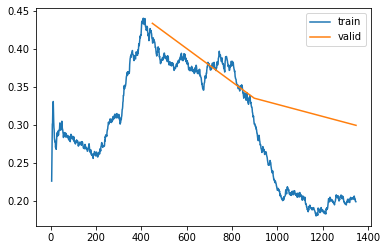

In [26]:
learn.recorder.plot_loss()

In [27]:
interp = ClassificationInterpretation.from_learner(learn)

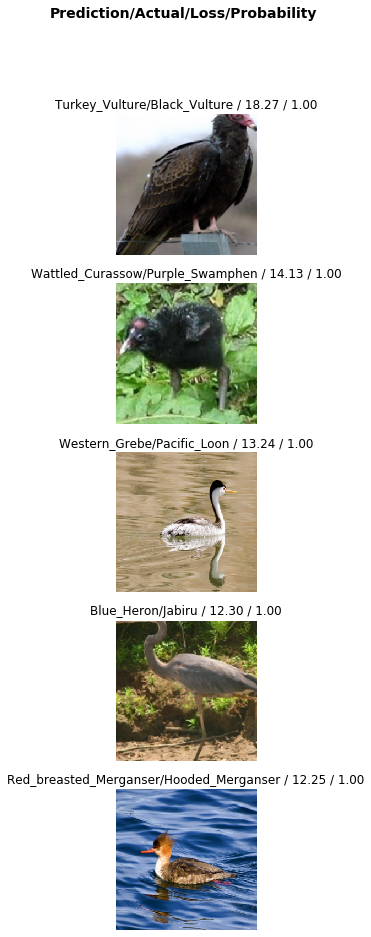

In [28]:
interp.plot_top_losses(5, nrows=5)

In [29]:
learn.export(fname = "second_training.pkl")

In [30]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.289244,0.381489,0.094702,11:51


epoch,train_loss,valid_loss,error_rate,time
0,0.271159,0.389138,0.096788,04:47
1,0.330021,0.419047,0.102628,04:46
2,0.266698,0.379484,0.092755,04:47
3,0.176541,0.326414,0.077736,04:51
4,0.106419,0.313898,0.074399,04:46


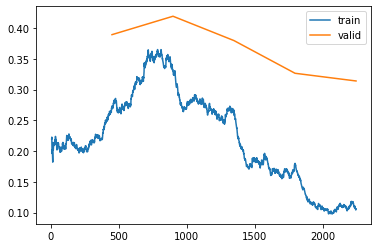

In [31]:
learn.recorder.plot_loss()

In [33]:
learn.export(fname = "3rd_training.pkl")

In [9]:
!cd

C:\Users\ms101\OneDrive\DataScience_ML\projects\birds_classifier


In [12]:
learn_inf = load_learner("C:/Users/ms101/OneDrive/DataScience_ML/projects/birds_classifier/first_training.pkl")

In [27]:
#create a list of possible classification names from the test directory
base_dir = "D:/datasets/birds/archive (2)/test"
test_species = []
for fn in os.listdir(base_dir):
    test_species.append(fn)
assert(len(test_species) == 225) #check if all folders ended up in the list

In [22]:
#loop through all
picture_names = ["/1.jpg","/2.jpg","/3.jpg","/4.jpg","/5.jpg"]
predictions = []
for species in test_species:
    for picture in picture_names:
        preds = learn_inf.predict(base_dir + "/" + species + picture)[0];
        predictions.append(preds)
print(len(predictions))
#predictions

1125


In [23]:
assert(len(predictions) == 225 * 5)

In [28]:
import numpy as np

test_species1 = np.repeat(test_species,5)
print(len(test_species))
print(test_species1[:26])
test_species[:26]

225
['African_Firefinch' 'African_Firefinch' 'African_Firefinch'
 'African_Firefinch' 'African_Firefinch' 'Albatross' 'Albatross'
 'Albatross' 'Albatross' 'Albatross' 'Alexandrine_Parakeet'
 'Alexandrine_Parakeet' 'Alexandrine_Parakeet' 'Alexandrine_Parakeet'
 'Alexandrine_Parakeet' 'American_Avocet' 'American_Avocet'
 'American_Avocet' 'American_Avocet' 'American_Avocet' 'American_Bittern'
 'American_Bittern' 'American_Bittern' 'American_Bittern'
 'American_Bittern' 'American_Coot']


['African_Firefinch',
 'Albatross',
 'Alexandrine_Parakeet',
 'American_Avocet',
 'American_Bittern',
 'American_Coot',
 'American_Goldfinch',
 'American_Kestrel',
 'American_Pipit',
 'American_Redstart',
 'Anhinga',
 'Annas_Hummingbird',
 'Antbird',
 'Araripe_Manakin',
 'Asian_Crested_Ibis',
 'Bald_Eagle',
 'Bali_Starling',
 'Baltimore_Oriole',
 'Bananaquit',
 'Barn_Owl',
 'Barn_Swallow',
 'Barred_Puffbird',
 'Bar_Tailed_Godwit',
 'Bay_Breasted_Warbler',
 'Bearded_Barbet',
 'Belted_Kingfisher']

In [29]:
#now test_species1 holds the true labels and predicitons holds the predicitions made by the NN
#time to check how many are correct.
assert(len(test_species1) == len(predictions))
correct = []
for label,pred in zip(test_species1,predictions):
    if label == pred:
        correct.append(1)
    else:
        correct.append(0)
    

In [32]:
correct = np.array(correct)
print(correct.shape)
correct[:10]

(1125,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [38]:
true_predictions = len(correct[np.where(correct == 1)])
false_predictions = len(correct[np.where(correct == 0)])

In [39]:
print("Correct Predictions:", true_predictions)

Correct Predictions: 1007


In [40]:
print("False Predictions:", false_predictions)

False Predictions: 118


In [42]:
print("Accuracy:", true_predictions/1125)

Accuracy: 0.8951111111111111


In [ ]:
#Test set accuracy of this model is 90 which is not great but not terrible either.

In [43]:
path

Path('D:/datasets/birds/images_complete/birds_train')

In [24]:
torch.cuda.empty_cache()

In [26]:
#I realized casting the images to 256*256 makes many of them larger than they were originally which might be problematic.I am repeating the learning with 224*224 and resnet50
birds = birds.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = birds.dataloaders(path, num_workers = 0, bs = 15)

In [27]:
learn = cnn_learner(dls,resnet50, metrics=error_rate).to_fp16()


SuggestedLRs(lr_min=0.0033113110810518267, lr_steep=0.00363078061491251)

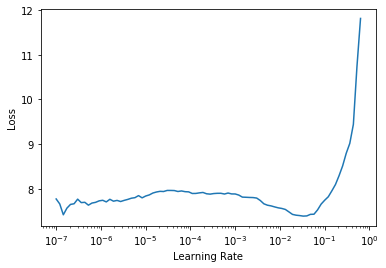

In [28]:
learn.lr_find()

In [29]:
learn.fine_tune(7,0.0036)

epoch,train_loss,valid_loss,error_rate,time
0,2.153904,1.172992,0.286886,13:03


epoch,train_loss,valid_loss,error_rate,time


RuntimeError: CUDA out of memory. Tried to allocate 2.00 MiB (GPU 0; 6.00 GiB total capacity; 746.79 MiB already allocated; 0 bytes free; 1.75 GiB reserved in total by PyTorch)

In [ ]:
learn.recorder.plot_loss()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9,  nrows=3, figsize = (20,15))

SuggestedLRs(lr_min=9.120108734350651e-06, lr_steep=2.2908675418875646e-06)

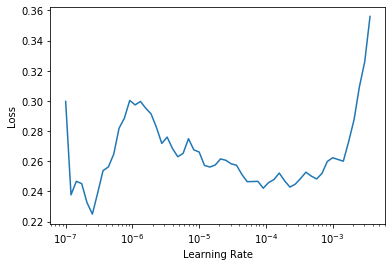

In [54]:
learn.lr_find()

In [55]:
learn.unfreeze()

SuggestedLRs(lr_min=1.737800812406931e-06, lr_steep=6.309573450380412e-07)

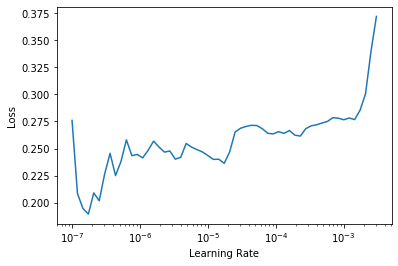

In [56]:
learn.lr_find()

In [57]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.946380,1.400475,0.318142,11:10


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\datasets\\birds\\images_complete\\birds_train\\Philadelphia_Vireo\\36.jpg'

In [ ]:
learn.freeze()